# Roles Classifier Alternative: Support Vector Machines with Kernels

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

## Testing Several Files

In [9]:
file_size = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 645]

svm_types = [SVC(C=1.0, kernel='linear'),
        SVC(C=1.0, kernel='poly', degree=3, gamma='auto'),
        SVC(C=1.0, kernel='rbf', gamma='auto'),
        SVC(C=1.0, kernel='sigmoid', gamma='auto')]

accuracies = []
for svm in svm_types:
    accuracy = []

    print(f'Training for SVM with kernel {svm.kernel}')
    print('==========================================\n')

    for i in file_size:
        file_name = f'output/balanced_{i}.csv'
        roles = pd.read_csv(f'../{file_name}')
        mapping = {'Student': 0, 'Co-Facilitator': 1, 'Facilitator': 2}
        roles['Role'] = roles['Role'].apply(lambda x: mapping[x])

        X = roles['Text']
        y = roles['Role']
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

        svm_classifier = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', svm),
        ])

        # Fitting our train data to the pipeline
        svm_classifier.fit(X_train, y_train)
        predicted = svm_classifier.predict(X_valid)

        accuracy_partial = np.mean(predicted == y_valid)
        print(f'Accuracy for file_size {i}: %.3f' % accuracy_partial)
        accuracy.append(accuracy_partial)

    print('\n')
    accuracies.append(accuracy)

Training for SVM with kernel linear

Accuracy for file_size 150: 0.733
Accuracy for file_size 200: 0.600
Accuracy for file_size 250: 0.380
Accuracy for file_size 300: 0.533
Accuracy for file_size 350: 0.586
Accuracy for file_size 400: 0.650
Accuracy for file_size 450: 0.567
Accuracy for file_size 500: 0.600
Accuracy for file_size 550: 0.636
Accuracy for file_size 600: 0.450
Accuracy for file_size 645: 0.682


Training for SVM with kernel poly

Accuracy for file_size 150: 0.300
Accuracy for file_size 200: 0.250
Accuracy for file_size 250: 0.280
Accuracy for file_size 300: 0.267
Accuracy for file_size 350: 0.343
Accuracy for file_size 400: 0.300
Accuracy for file_size 450: 0.267
Accuracy for file_size 500: 0.280
Accuracy for file_size 550: 0.300
Accuracy for file_size 600: 0.283
Accuracy for file_size 645: 0.295


Training for SVM with kernel rbf

Accuracy for file_size 150: 0.133
Accuracy for file_size 200: 0.275
Accuracy for file_size 250: 0.320
Accuracy for file_size 300: 0.300
Accura

## Graphical Performance Analysis

In the following plots we can see the how the model behaves when it is trained with different amounts of data.

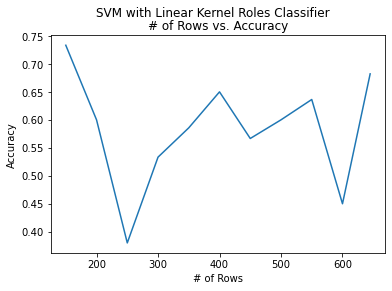

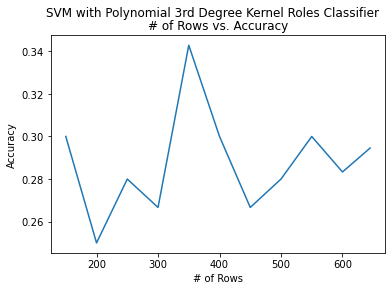

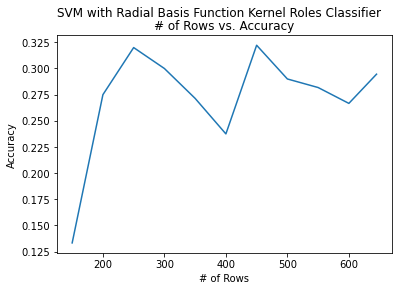

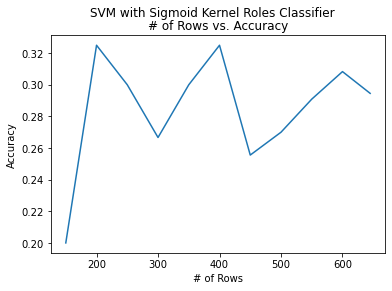

In [10]:
%matplotlib inline

plt.plot(file_size, accuracies[0])
plt.title('# of Rows vs. Accuracy')
plt.suptitle('SVM with Linear Kernel Roles Classifier')
plt.xlabel('# of Rows')
plt.ylabel('Accuracy')
plt.show()

plt.plot(file_size, accuracies[1])
plt.title('# of Rows vs. Accuracy')
plt.suptitle('SVM with Polynomial 3rd Degree Kernel Roles Classifier')
plt.xlabel('# of Rows')
plt.ylabel('Accuracy')
plt.show()

plt.plot(file_size, accuracies[2])
plt.title('# of Rows vs. Accuracy')
plt.suptitle('SVM with Radial Basis Function Kernel Roles Classifier')
plt.xlabel('# of Rows')
plt.ylabel('Accuracy')
plt.show()

plt.plot(file_size, accuracies[3])
plt.title('# of Rows vs. Accuracy')
plt.suptitle('SVM with Sigmoid Kernel Roles Classifier')
plt.xlabel('# of Rows')
plt.ylabel('Accuracy')
plt.show()

In [11]:
print(f'Mean Accuracy - SVM with Linear Kernel: {np.mean(accuracy)}')
print(f'Mean Accuracy - SVM with Polynomial 3rd Degree Kernel: {np.mean(accuracy)}')
print(f'Mean Accuracy - SVM with Radial Basis Function Kernel: {np.mean(accuracy)}')
print(f'Mean Accuracy - SVM with Sigmoid Kernel: {np.mean(accuracy)}')


Mean Accuracy - SVM with Linear Kernel: 0.28509438998868175
Mean Accuracy - SVM with Polynomial 3rd Degree Kernel: 0.28509438998868175
Mean Accuracy - SVM with Radial Basis Function Kernel: 0.28509438998868175
Mean Accuracy - SVM with Sigmoid Kernel: 0.28509438998868175


## Conclusions

- The model shows a very poor performance with the datasets, and we can see that the behavior is random, from which we can conclude that SVM was not able to learn anything from the datasets.
